## Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
    )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df=df_can

In [5]:
df.to_csv("Canada Data")

In [6]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
df=df.drop(["Type","Coverage","REG","DEV"],axis=1)

In [9]:
df.head()

,OdName,AREA,AreaName,RegName,DevName,1980,1981,1982,1983,1984,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,935,Asia,Southern Asia,Developing regions,16,39,39,47,71,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,908,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,903,Africa,Northern Africa,Developing regions,80,67,71,69,63,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,909,Oceania,Polynesia,Developing regions,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,908,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [22]:
df.rename(columns={"OdName":"Country","AreaName":"Continent","RegName":"Region"},inplace=True)

In [24]:
df.head(1)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004


In [25]:
df.set_index('Country',inplace=True)

In [26]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [28]:
df.shape

(195, 37)

In [31]:
df["Total"]=df.sum(axis=1)

<ipython-input-31-7fd74a8a1f2a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["Total"]=df.sum(axis=1)


In [32]:
df.head(1)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639


#### Pie chart

In [86]:
years=list(map(str, range(1980,2014)))

In [34]:
df.columns=(list(map(str, df.columns)))

In [38]:
mpl.style.use(['ggplot'])

In [39]:
dfContinents=df.groupby('Continent',axis=0).sum()

In [40]:
dfContinents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


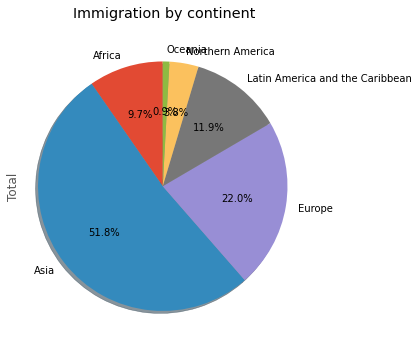

In [46]:
dfContinents["Total"].plot(kind='pie',
                 figsize=(5,6),
                 startangle=90,
                 shadow=True,
                 autopct='%1.1f%%')

plt.title("Immigration by continent")
plt.axis("equal") #circle

plt.show()

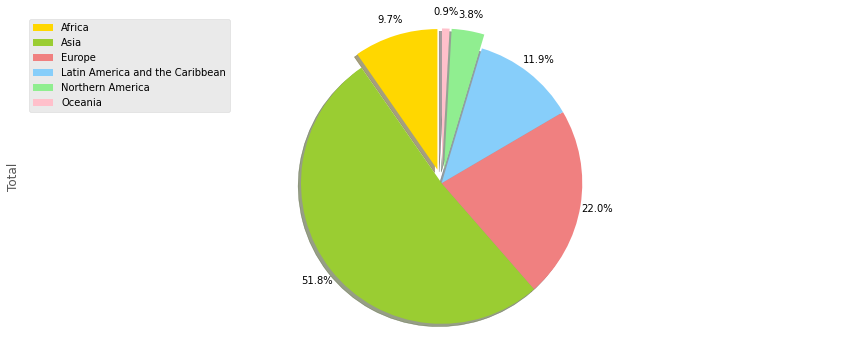

In [84]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]
dfContinents["Total"].plot(kind='pie',
                          figsize=(15,6),
                          autopct='%1.1f%%',
                          startangle=90,
                          shadow=True,
                          labels=None,
                          pctdistance=1.12,
                          colors=colors_list,
                          explode=explode_list)

plt.axis('equal') 

# add legend
plt.legend(labels=dfContinents.index, loc='upper left') 

plt.show()

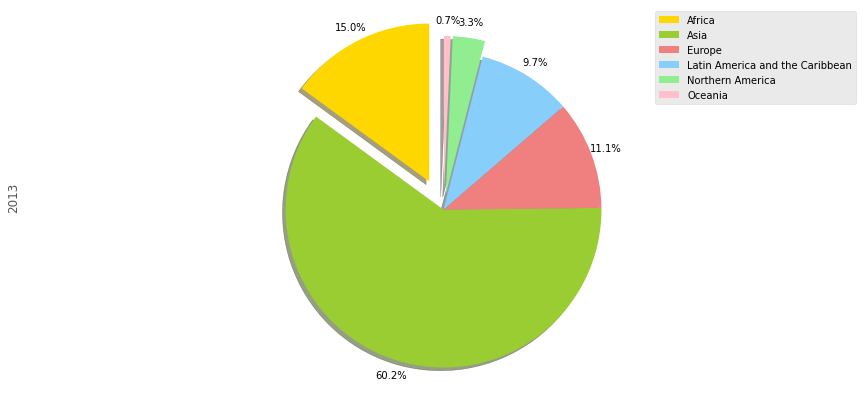

In [80]:
dfContinents["2013"].plot(kind='pie',
                         startangle=90,
                         autopct='%1.1f%%',
                         figsize=(15,7),
                         explode=[0.2,0,0,0,0.1,0.1],
                         shadow=True,
                         pctdistance=1.1,
                         labels=None,
                         colors=colors_list)
plt.axis('equal')
plt.legend(labels=dfContinents.index,loc='upper right')

In [88]:
JPY=df.loc["Japan",years].transpose()
JPY.head()

1980    701
1981    756
1982    598
1983    309
1984    246
Name: Japan, dtype: object

Text(0, 0.5, 'Number of immigrants')

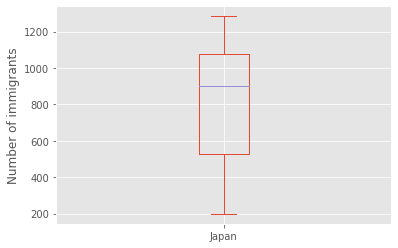

In [91]:
JPY.plot(kind='box')
plt.ylabel("Number of immigrants")

In [94]:
Chind=df.loc[["China","India"],price].transpose()

In [95]:
Chind.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


<AxesSubplot:>

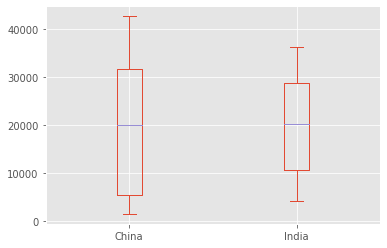

In [96]:
Chind.plot(kind='box')

In [98]:
Chind.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


horizontal box plots

Text(0.5, 0, 'Number of immigrants')

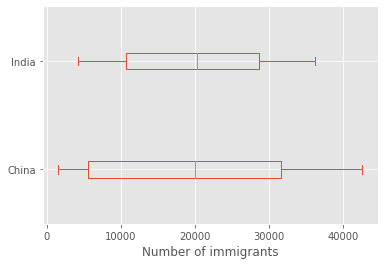

In [100]:
Chind.plot(kind='box',vert=False)
plt.xlabel("Number of immigrants")

#### Subplots

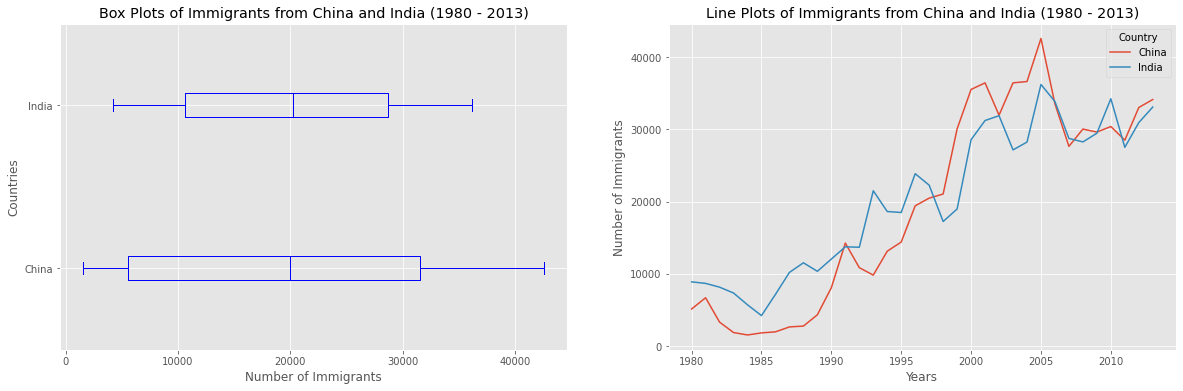

In [101]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
Chind.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
Chind.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

#### Scatter plots

In [115]:
#lets visualize the trend of total immigration to canada
dfTotal=pd.DataFrame(df[years].sum(axis=0))
dfTotal.index=map(int, dfTotal.index)
dfTotal.reset_index(inplace=True)
dfTotal.head()

,index,0
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [126]:
dfTotal=dfTotal.rename(columns={'index':'Year',0:'Total'})
dfTotal.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<AxesSubplot:xlabel='Year', ylabel='Total'>

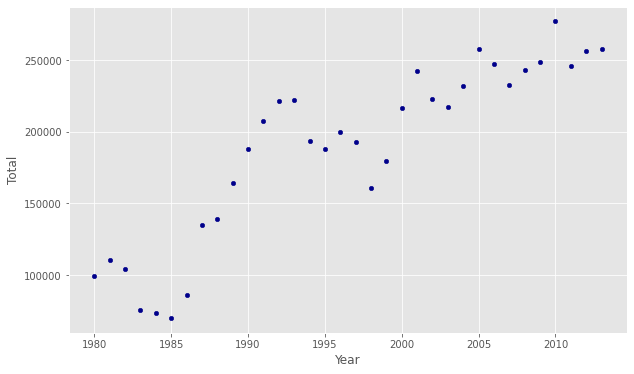

In [125]:
dfTotal.plot(kind="scatter", x='Year',y='Total', figsize=(10,6), color='darkblue')

#### Bubble plots

In [127]:
# transposed dataframe
df_can_t = df[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [128]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

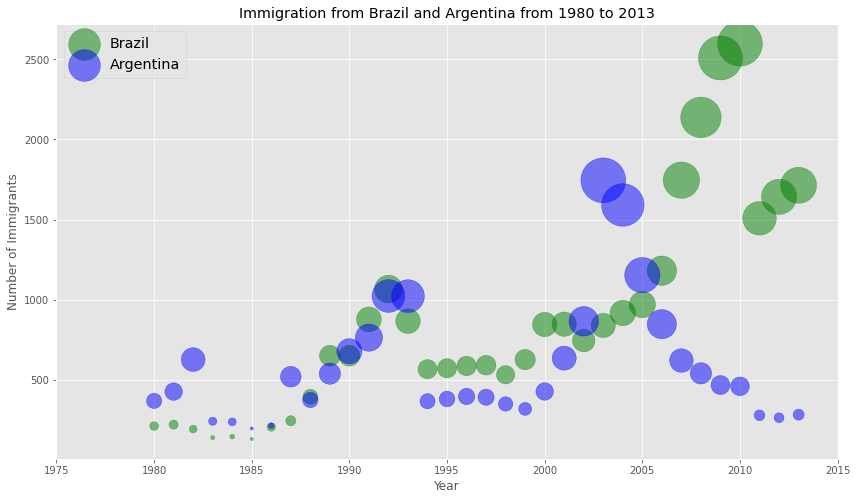

In [129]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [130]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [181]:
yu=df.columns[3:37]

In [182]:
yu=list(map(int, yu))

In [188]:
x=df.loc["Afghanistan"]

In [244]:
x=x[3:37]

In [195]:
map(int, x)

In [199]:
x.dtypes

dtype('O')

In [246]:
yht=df.loc[["Afghanistan","Algeria","Kenya"]]

In [253]:
df1=pd.read_csv("Anotherone.csv")

In [254]:
df1.head()

,Unnamed: 0,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


In [257]:
df1.drop(['Unnamed: 0'],axis=1)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single
...,...,...,...,...,...,...,...,...,...
495,10496,0,47,"$113,125",7,enrolled,23-01-2014,2,Single
496,10497,0,49,"$118,108",7,enrolled,01-10-2007,1,Single
497,10498,0,42,"$97,353",8,enrolled,21-05-2009,5,Married
498,10499,1,22,"$34,424",1,notenrolled,NaN,2,Single


In [258]:
df1.set_index('CUSTOMERID', inplace=True)

In [259]:
df1.head()

,Unnamed: 0,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
CUSTOMERID,,,,,,,,,
10001,0,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
10002,1,0,42,"$94,475",9,notenrolled,NaN,6,Married
10003,2,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
10004,3,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
10005,4,0,30,"$51,498",3,notenrolled,NaN,1,Single
